In [1]:
#!pip install wfdb

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wfdb
import re
record_name = "../aura-data/100001/100001_ECG"
record_name_ann = "../aura-data/100001/100001_ANN"

In [125]:
header_list = ["start1", "end1", "class1","start2", "end2", "class2","start3", "end3", "class3","start", "end", "class"]
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv", names=header_list)

In [126]:
dataann.head()

,start1,end1,class1,start2,end2,class2,start3,end3,class3,start,end,class
0,1.0,198867.0,2.0,1.0,19525.0,1.0,1,7047,2,1.0,7047.0,2.0
1,198868.0,320282.0,1.0,19526.0,28694.0,2.0,7048,17209,1,7048.0,17209.0,1.0
2,320283.0,373109.0,2.0,28695.0,32739.0,1.0,17210,28390,2,17210.0,28694.0,2.0
3,373110.0,2197974.0,1.0,32740.0,96699.0,2.0,28391,32653,1,28695.0,32653.0,1.0
4,2197975.0,2582746.0,2.0,96700.0,110564.0,1.0,32654,71061,2,32654.0,112474.0,2.0


In [127]:
dataann.shape

(1246, 12)

In [130]:
dataann_nan_class = dataann[dataann["class"].notnull() & dataann["start"].notnull() & dataann["end"].notnull() ]
dataann_nan_class.shape

(763, 12)

In [92]:
dataann.dropna().shape

(201, 12)

In [96]:
dataannclear = dataann.dropna()
dataannclear.astype('int32').dtypes
dataannclear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start1  201 non-null    float64
 1   end1    201 non-null    float64
 2   class1  201 non-null    float64
 3   start2  201 non-null    float64
 4   end2    201 non-null    float64
 5   class2  201 non-null    float64
 6   start3  201 non-null    int64  
 7   end3    201 non-null    int64  
 8   class3  201 non-null    int64  
 9   start   201 non-null    float64
 10  end     201 non-null    float64
 11  class   201 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 20.4 KB


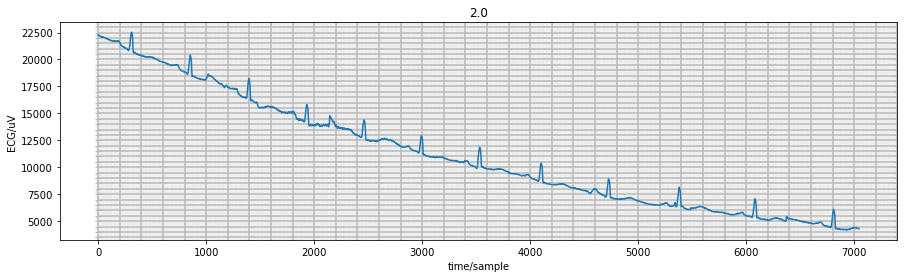

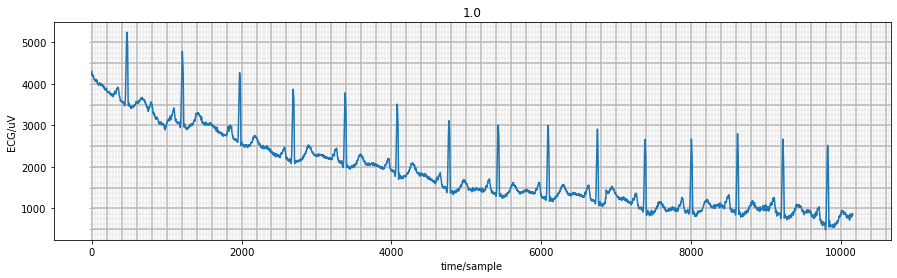

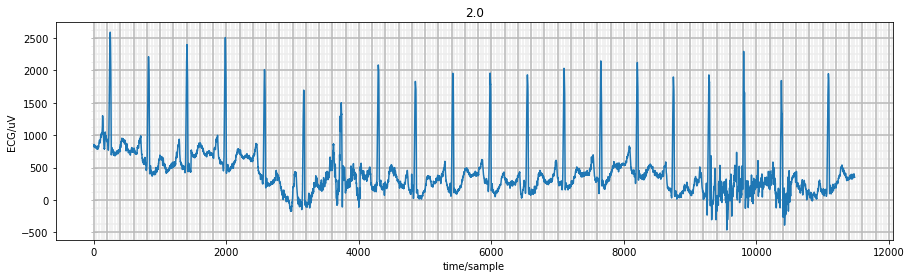

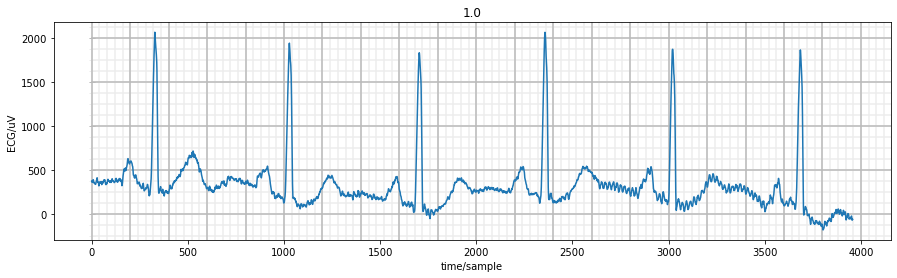

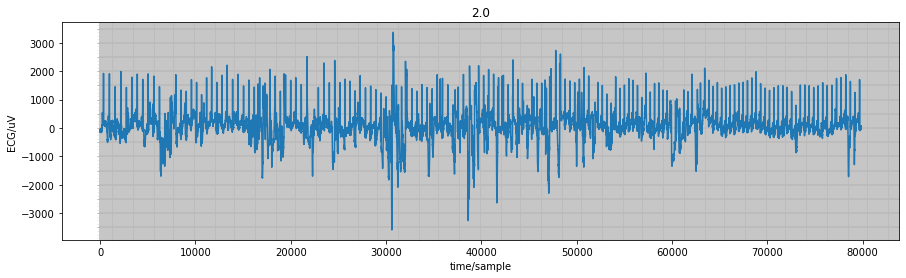

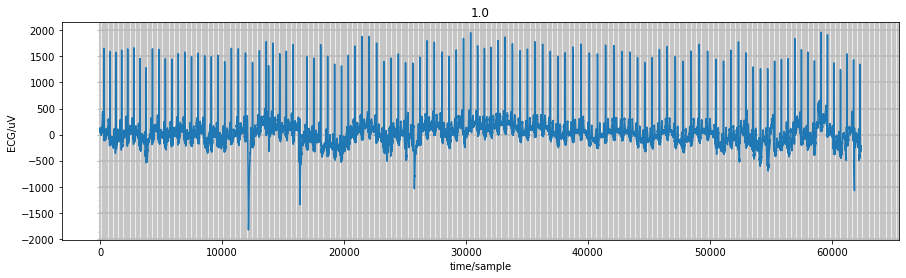

In [114]:
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(15,4), ecg_grids='all')
    if i > 4:
        break

In [116]:
header_list = ["start1", "end1", "class1","start2", "end2", "class2","start3", "end3", "class3","start", "end", "class"]
record_list = wfdb.get_record_list('butqdb')
record_list[0]


'100001/100001_ACC'

In [154]:
listecg=[]
listclass=[]
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv", names=header_list)
for rcd in record_list:
    if re.search(r'ECG$', rcd):
        record_name = f"../aura-data/{rcd}"
        print(record_name)
        record_csv = f"../aura-data/{rcd.replace('ECG','ANN')}.csv"
        dataann = pd.read_csv(record_csv, names=header_list)
        dataann_nan_class = dataann[dataann["class"].notnull() & dataann["start"].notnull() & dataann["end"].notnull() ]
        for i in dataann_nan_class.index:
            record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))
            listecg.append(record.adc())
            listclass.append(int(dataann_nan_class["class"][i]))

../aura-data/100001/100001_ECG
../aura-data/100002/100002_ECG
../aura-data/103001/103001_ECG
../aura-data/103002/103002_ECG
../aura-data/103003/103003_ECG
../aura-data/104001/104001_ECG
../aura-data/105001/105001_ECG
../aura-data/111001/111001_ECG
../aura-data/113001/113001_ECG
../aura-data/114001/114001_ECG
../aura-data/115001/115001_ECG
../aura-data/118001/118001_ECG
../aura-data/121001/121001_ECG
../aura-data/122001/122001_ECG
../aura-data/123001/123001_ECG
../aura-data/124001/124001_ECG
../aura-data/125001/125001_ECG
../aura-data/126001/126001_ECG


In [155]:
#listecg = np.array(listecg)
#Nombre de segment tagués
print(len(listecg),len(listclass))

7154 7154


In [156]:
listecg

[array([[32270],
        [32272],
        [32286],
        ...,
        [-3587],
        [-3587],
        [-3593]]),
 array([[ -3617],
        [ -3685],
        [ -3729],
        ...,
        [-10481],
        [-10483],
        [-10509]]),
 array([[-10539],
        [-10505],
        [-10517],
        ...,
        [-11495],
        [-11493],
        [-11499]]),
 array([[-11454],
        [-11473],
        [-11485],
        ...,
        [-12330],
        [-12330],
        [-12326]]),
 array([[-12358],
        [-12394],
        [-12461],
        ...,
        [-12064],
        [-12042],
        [-12066]]),
 array([[-12076],
        [-12086],
        [-12104],
        ...,
        [-12639],
        [-12631],
        [-12641]]),
 array([[-12593],
        [-12589],
        [-12601],
        ...,
        [-12000],
        [-12000],
        [-11990]]),
 array([[-12060],
        [-12130],
        [-12176],
        ...,
        [-12575],
        [-12591],
        [-12599]]),
 array([[-12601],
    

In [145]:
listclass

[2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0

In [163]:
listecg = np.array(listecg)
listecg.shape
listecg[0].shape

(7046, 1)

In [77]:
record = wfdb.rdrecord(record_name, sampfrom=20000, sampto=25000)

In [65]:
record.adc()

array([[-11501],
       [-11515],
       [-11537],
       ...,
       [-11475],
       [-11455],
       [-11412]])

<Figure size 1440x864 with 0 Axes>

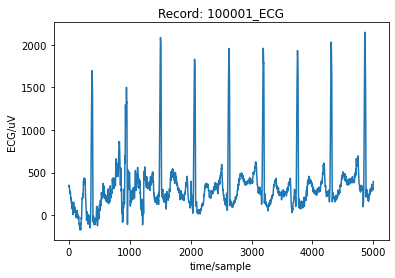

In [66]:
plt.figure(figsize=(20,12))
wfdb.plot_wfdb(record=record)

In [41]:
wfdb.get_record_list("/Users/david/Documents/Data-Jedha.nosync/Aura/aura-data", records='all')

MissingSchema: Invalid URL '/Users/david/Documents/Data-Jedha.nosync/Aura/aura-data/RECORDS': No schema supplied. Perhaps you meant http:///Users/david/Documents/Data-Jedha.nosync/Aura/aura-data/RECORDS?

In [39]:
dbs = wfdb.get_dbs()
dbs

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['butqdb', 'Brno University of Technology ECG Quality Database (BUT QDB)'],
 ['capslpdb', 'CAP Sleep Database'],
 ['cdb', 'MIT-BIH ECG Compression Test Database'],
 ['cded', 'Cerebromicrovascular Disease in Elderly with Diabetes'],
 ['cebsdb', 'Combined measurement of ECG, Breathing and Seismocardiograms'],
 ['ce

In [42]:
wfdb.get_record_list('butqdb')

['100001/100001_ACC',
 '100001/100001_ECG',
 '100002/100002_ACC',
 '100002/100002_ECG',
 '103001/103001_ACC',
 '103001/103001_ECG',
 '103002/103002_ACC',
 '103002/103002_ECG',
 '103003/103003_ACC',
 '103003/103003_ECG',
 '104001/104001_ACC',
 '104001/104001_ECG',
 '105001/105001_ACC',
 '105001/105001_ECG',
 '111001/111001_ACC',
 '111001/111001_ECG',
 '113001/113001_ACC',
 '113001/113001_ECG',
 '114001/114001_ACC',
 '114001/114001_ECG',
 '115001/115001_ACC',
 '115001/115001_ECG',
 '118001/118001_ACC',
 '118001/118001_ECG',
 '121001/121001_ACC',
 '121001/121001_ECG',
 '122001/122001_ACC',
 '122001/122001_ECG',
 '123001/123001_ACC',
 '123001/123001_ECG',
 '124001/124001_ACC',
 '124001/124001_ECG',
 '125001/125001_ACC',
 '125001/125001_ECG',
 '126001/126001_ACC',
 '126001/126001_ECG']

In [68]:
record = wfdb.rdrecord(record_name, sampto=3000)
ann = wfdb.rdann(record_name_ann, 'csv', sampto=3000)

FileNotFoundError: [Errno 2] No such file or directory: '100001/100001_ANN.csv'

In [71]:

record_name_ann = "../aura-data/100001/100001_ANN"
ann = wfdb.rdann('100001/100001_ANN', 'csv',pn_dir='butqdb',return_label_elements={"s1","e1","symbol1","s2","e2","symbol2","s3","e3","symbol3","s","e","symbol"})

NameError: name 'label_types' is not defined

In [54]:
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv")

In [55]:
dataann.head()

,1,198867,2,1.1,19525,1.2,1.3,7047,2.1,1.4,7047.1,2.2
0,198868.0,320282.0,1.0,19526.0,28694.0,2.0,7048,17209,1,7048.0,17209.0,1.0
1,320283.0,373109.0,2.0,28695.0,32739.0,1.0,17210,28390,2,17210.0,28694.0,2.0
2,373110.0,2197974.0,1.0,32740.0,96699.0,2.0,28391,32653,1,28695.0,32653.0,1.0
3,2197975.0,2582746.0,2.0,96700.0,110564.0,1.0,32654,71061,2,32654.0,112474.0,2.0
4,2582747.0,2782616.0,1.0,110565.0,112474.0,2.0,71062,72663,3,112475.0,174872.0,1.0


In [56]:
dataann.describe()

,1,198867,2,1.1,19525,1.2,1.3,7047,2.1,1.4,7047.1,2.2
count,2.000000e+02,2.000000e+02,200.000000,3.100000e+02,3.100000e+02,310.000000,1.245000e+03,1.245000e+03,1245.000000,7.620000e+02,7.620000e+02,762.000000
mean,4.964884e+07,5.008328e+07,1.510000,4.620613e+07,4.648699e+07,1.509677,5.370015e+07,5.377010e+07,1.510040,5.108421e+07,5.119849e+07,1.505249
std,2.433314e+07,2.422121e+07,0.511083,2.494077e+07,2.490919e+07,0.513478,2.003347e+07,1.999784e+07,0.511228,1.860509e+07,1.855833e+07,0.505527
min,1.988680e+05,3.202820e+05,1.000000,1.952600e+04,2.869400e+04,1.000000,7.048000e+03,1.720900e+04,1.000000,7.048000e+03,1.720900e+04,1.000000
25%,2.542360e+07,2.600449e+07,1.000000,2.821933e+07,2.823565e+07,1.000000,4.086735e+07,4.089389e+07,1.000000,4.093120e+07,4.100449e+07,1.000000
50%,5.482821e+07,5.504952e+07,2.000000,4.830778e+07,4.878222e+07,2.000000,5.476250e+07,5.477073e+07,2.000000,5.123667e+07,5.124155e+07,2.000000
75%,6.919185e+07,6.925538e+07,2.000000,7.168165e+07,7.185147e+07,2.000000,6.861723e+07,6.862473e+07,2.000000,6.323645e+07,6.355387e+07,2.000000
max,8.682713e+07,8.708700e+07,3.000000,8.405555e+07,8.708700e+07,3.000000,8.658842e+07,8.708700e+07,3.000000,8.682713e+07,8.708700e+07,3.000000


In [57]:
# Demo 15 - View the standard WFDB annotation labels
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     